## Task 1

## Task 2

The R2 score is: 0.9874698094589166
The RMSE score is: 3.9427519223478177e+28


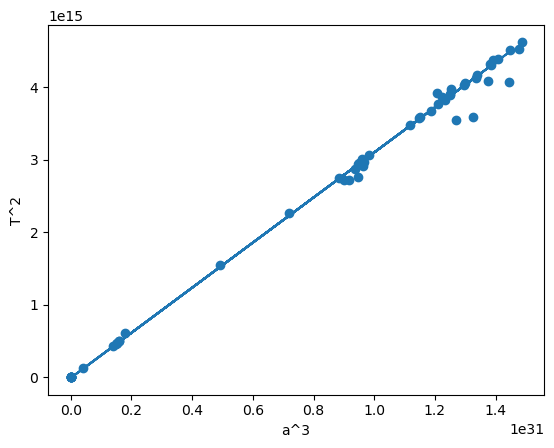

In [1]:
import Jupiter as jp
import pandas as pd
import numpy as np

def Kippler(row):
    jupiter_mass =np.sqrt(((row["distance_km"]**3)*4*(np.pi)**2)/((row["period_days"]**2)*(6.67*10**-11)))

    return jupiter_mass

connectable = f"sqlite:///jupiter.db"
Query = ("SELECT * FROM moons")

moons_df = pd.read_sql(Query, connectable, index_col="moon")
moons_df["predicted_mass"] = moons_df.apply(Kippler, axis=1)
moons_df["T^2"] = (moons_df["period_days"]*86400)**2
moons_df["a^3"] = (moons_df["distance_km"]*1000)**3

jupiter_instance = jp.Moons()
jupiter_instance.model()
jupiter_instance.plot()

In [2]:
jupiter_instance.review_data()

,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg,predicted_mass,T^2,a^3
moon,,,,,,,,,,,
Adrastea,0.298000,129000.0,8.20,NaN,NaN,Inner,0.001500,0.03,1.196149e+14,6.629183e+08,2.146689e+24
Aitne,730.000000,23231000.0,1.50,22.70,NaN,Carme,0.264000,165.00,1.180038e+14,3.978077e+15,1.253729e+31
Amalthea,0.498000,181400.0,83.50,14.10,2.080000e+18,Inner,0.003190,0.37,1.193558e+14,1.851340e+09,5.969141e+24
Ananke,630.000000,21300000.0,14.00,18.90,NaN,Ananke,0.174725,148.60,1.200455e+14,2.962843e+15,9.663597e+30
Aoede,761.000000,24000000.0,2.00,22.50,NaN,Pasiphae,0.432000,158.00,1.188637e+14,4.323115e+15,1.382400e+31
Arche,724.000000,22931000.0,1.50,22.80,NaN,Carme,0.259000,165.00,1.166844e+14,3.912953e+15,1.205783e+31
Autonoe,719.000000,23039000.0,2.00,22.00,NaN,Pasiphae,0.334000,153.00,1.183269e+14,3.859093e+15,1.222900e+31
Callirrhoe,787.000000,24583090.0,4.80,20.80,NaN,Pasiphae,0.309570,148.00,1.191508e+14,4.623565e+15,1.485626e+31
Callisto,16.689018,1882700.0,2410.30,5.65,1.075938e+23,Galilean,0.007400,2.02,1.190852e+14,2.079166e+12,6.673342e+27


c:\Users\hueyp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


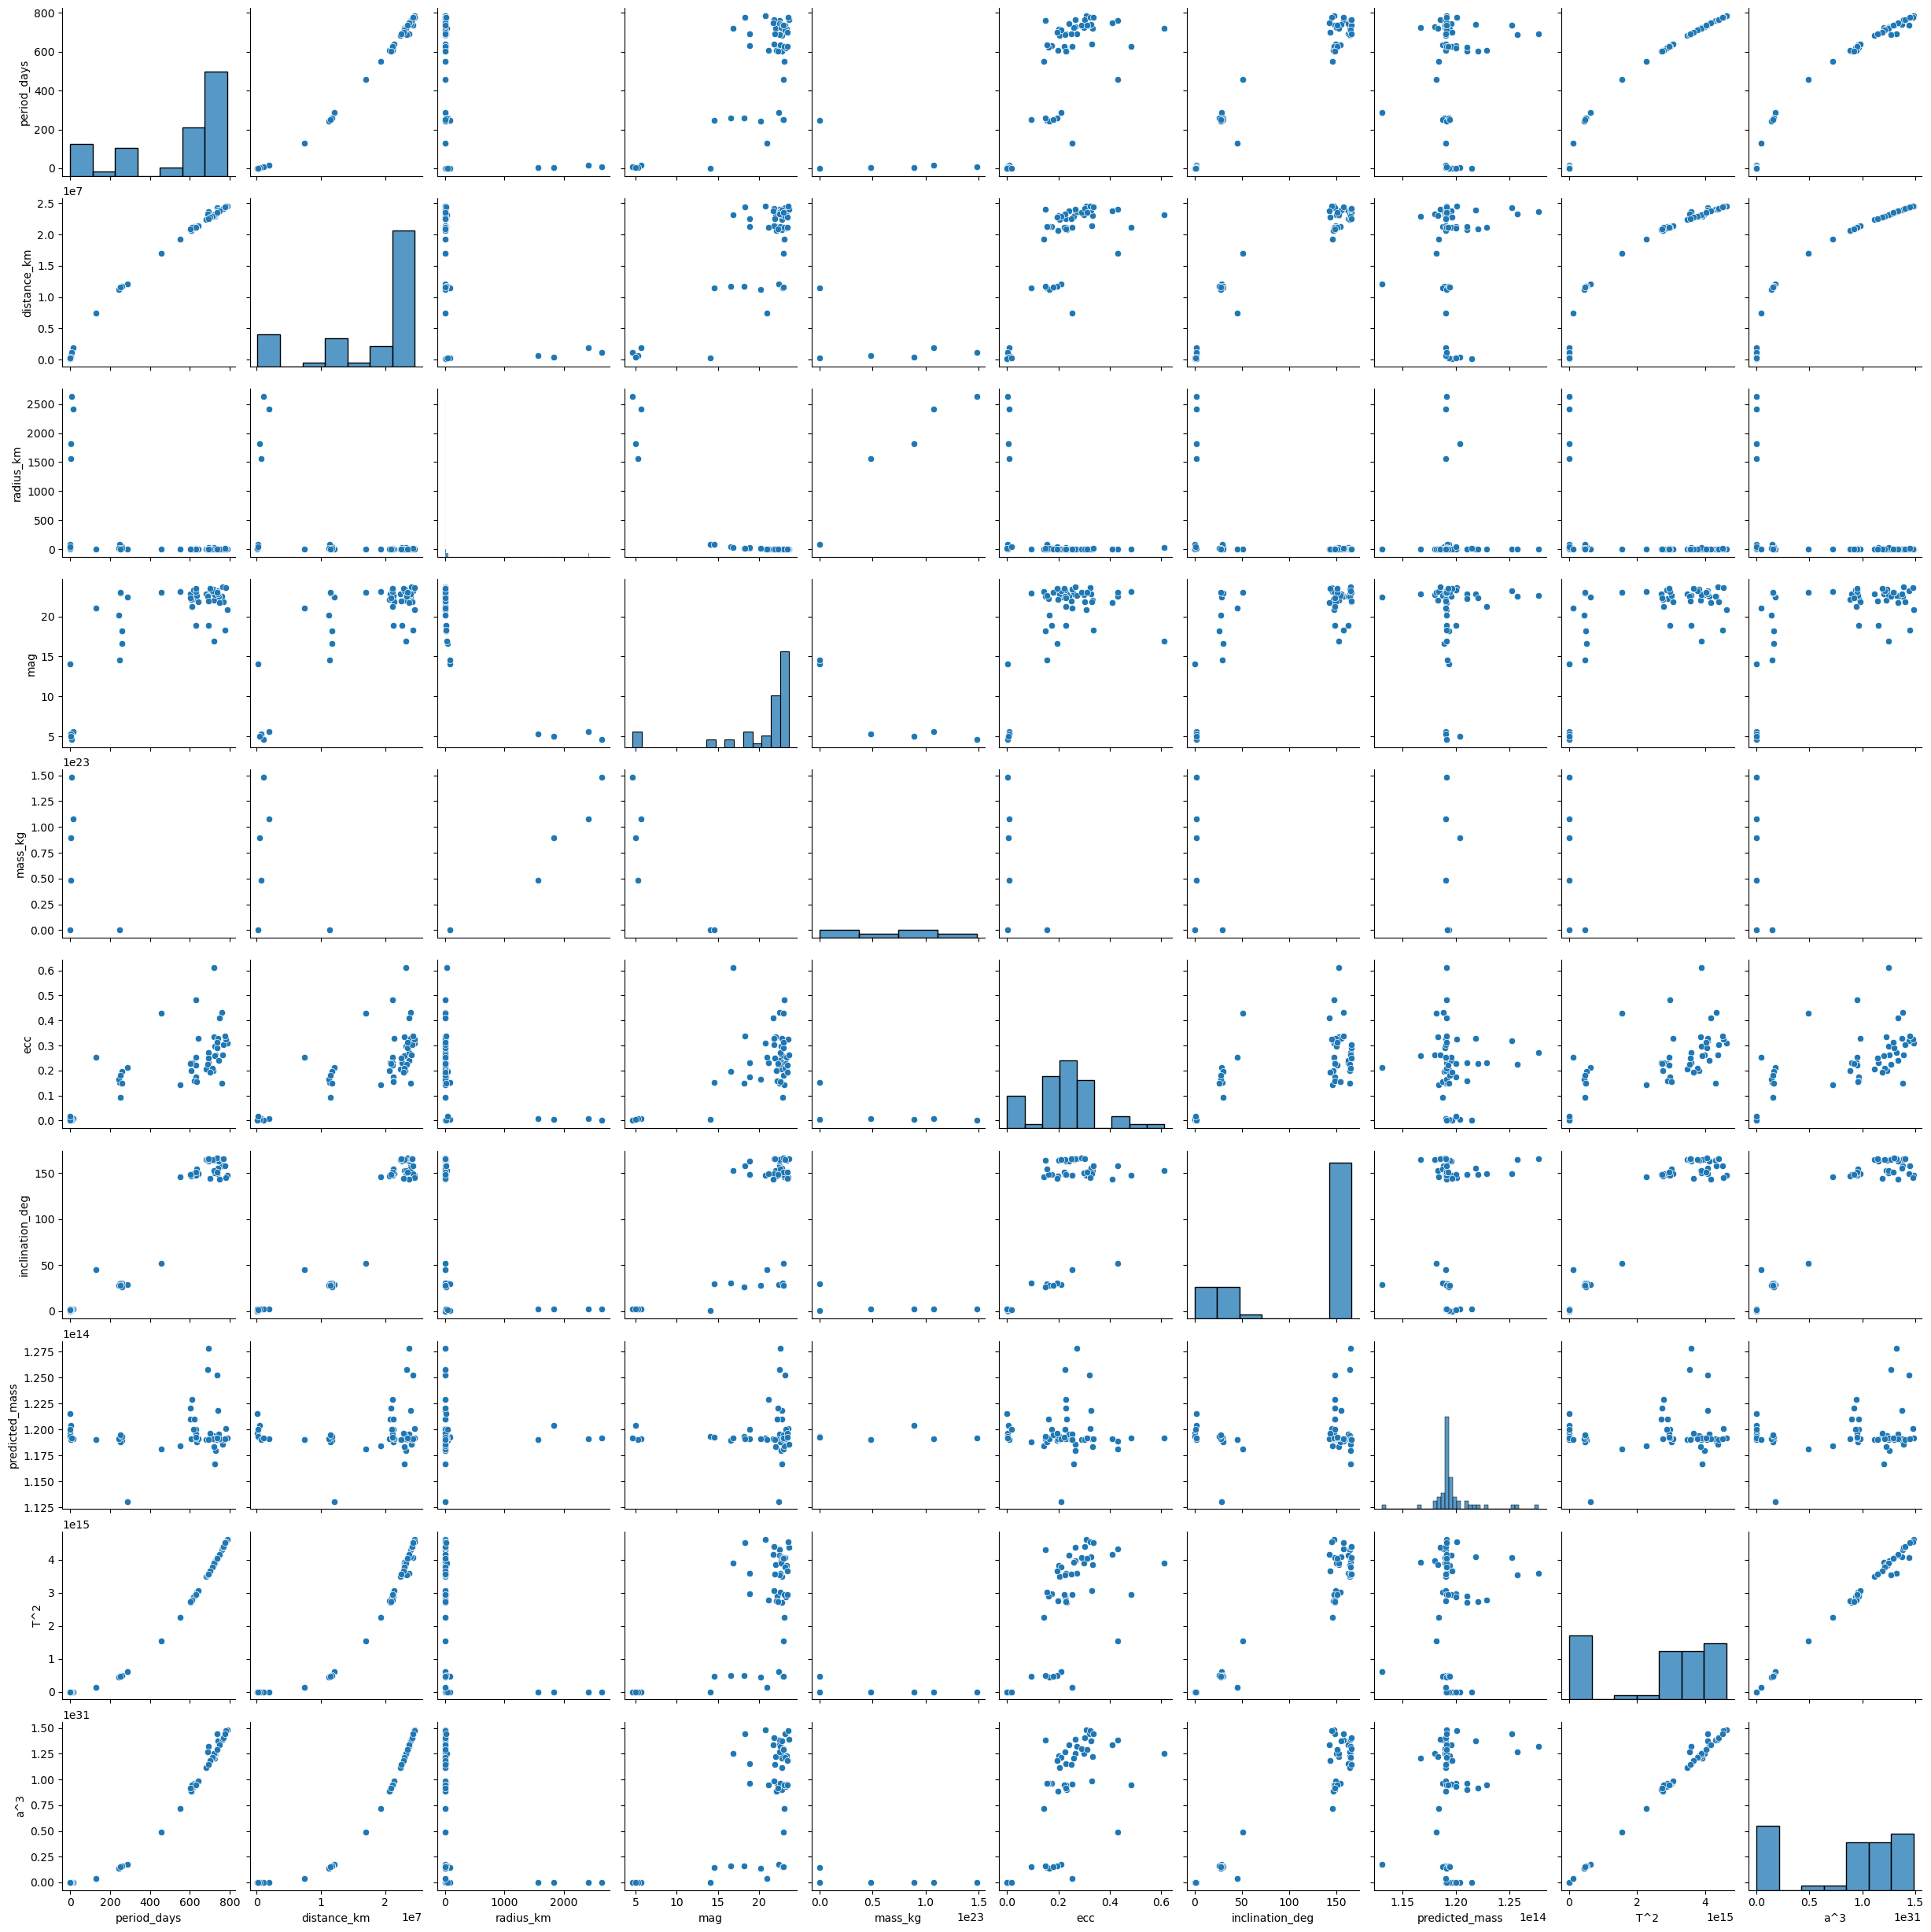

In [3]:
jupiter_instance.relationship_view()

In [4]:
from sklearn import linear_model

model = linear_model.LinearRegression(fit_intercept=True)

X = moons_df[["a^3"]]
Y = moons_df["T^2"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


model.fit(x_train,y_train)

pred_T2 = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
print(f"The R2 score is: {r2_score(y_test,pred_T2)}")
print(f"The RMSE score is: {mean_squared_error(y_test,pred_T2, squared=True)}")



The R2 score is: 0.9874698094589166
The RMSE score is: 3.9427519223478177e+28


Text(0, 0.5, 'T^2')

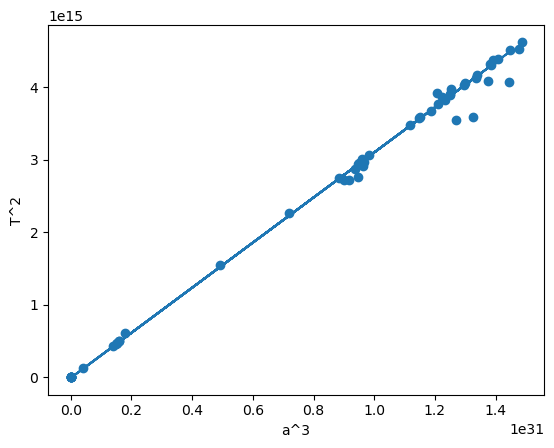

In [5]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()

#Create a scatter plot of the known a^3-T^2 values
ax.scatter(moons_df["a^3"],moons_df["T^2"])

#Draw line to represent the predicted T^2-values
ax.plot(x_test,pred_T2)

# Axis labels
ax.set_xlabel("a^3")
ax.set_ylabel("T^2")

In [6]:
M = (4* np.pi**2) / (model.coef_[0]*6.67e-11)

print(f"The mass of jupiter is predicted to be {M}Kg")

The mass of jupiter is predicted to be 1.9045035734306243e+27Kg
